In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:

x_train = df['sqft_living'].values
y_train = df['price'].values

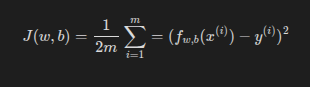
Cost Function

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    f_wb = w*x + b
    cost = np.sum((f_wb - y)**2)
    return cost/(2*m)


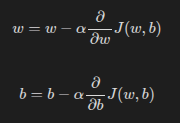
Gradient Descent

In [5]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    f_wb = w*x + b
    dw = np.sum((f_wb - y)*x) / m
    db = np.sum(f_wb - y) / m

    return db, dw

In [6]:
def gradient_descent(x,y,w,b,alpha,compute_cost,compute_gradient,num_iters):
    J_history = []
    p_history = []
    for i in range(num_iters):
        db, dw = compute_gradient(x,y,w,b)
        b = b - alpha*db
        w = w - alpha*dw

        cost = compute_cost(x,y,w,b)
        J_history.append(cost)
        p_history.append([w,b])
        
        if i%math.ceil(num_iters/100) == 0:
            print(f"Iteration {i:4}: cost {J_history[-1]:0.2e}",
                  f"db:{db: 0.3e}, dw:{dw: 0.3e}  ",
                  f"w:{w: 0.3e}, b:{b: 0.3e}")

    return w,b,J_history,p_history

Iteration    0: cost 2.13e+11 db:-5.401e+05, dw:-2.577e+05   w: 2.578e+02, b: 5.401e+02
Iteration   50: cost 1.96e+11 db:-5.137e+05, dw:-2.452e+05   w: 1.282e+04, b: 2.687e+04
Iteration  100: cost 1.80e+11 db:-4.887e+05, dw:-2.332e+05   w: 2.477e+04, b: 5.191e+04
Iteration  150: cost 1.67e+11 db:-4.648e+05, dw:-2.218e+05   w: 3.614e+04, b: 7.573e+04
Iteration  200: cost 1.54e+11 db:-4.421e+05, dw:-2.110e+05   w: 4.695e+04, b: 9.839e+04
Iteration  250: cost 1.43e+11 db:-4.206e+05, dw:-2.007e+05   w: 5.724e+04, b: 1.199e+05
Iteration  300: cost 1.32e+11 db:-4.000e+05, dw:-1.909e+05   w: 6.702e+04, b: 1.404e+05
Iteration  350: cost 1.23e+11 db:-3.805e+05, dw:-1.816e+05   w: 7.632e+04, b: 1.599e+05
Iteration  400: cost 1.14e+11 db:-3.620e+05, dw:-1.727e+05   w: 8.518e+04, b: 1.785e+05
Iteration  450: cost 1.07e+11 db:-3.443e+05, dw:-1.643e+05   w: 9.360e+04, b: 1.961e+05
Iteration  500: cost 9.99e+10 db:-3.275e+05, dw:-1.563e+05   w: 1.016e+05, b: 2.129e+05
Iteration  550: cost 9.36e+10 db

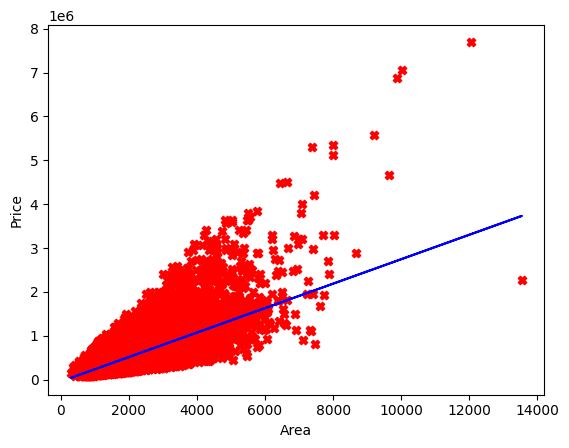

In [7]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_norm = (x_train - x_mean)/x_std

pl.scatter(x_train,y_train,marker = 'X' , color = 'red')
pl.xlabel('Area')
pl.ylabel('Price')

w_init = 0.1
b_init = 0.01
alpha = 0.001
iters = 5000
w_final,b_final,J_hist,p_hist = gradient_descent(x_norm,y_train,w_init,b_init,alpha,compute_cost,compute_gradient,iters)
y_pred = w_final*x_norm + b_final
pl.plot(x_train,y_pred,color = 'blue')
pl.show()

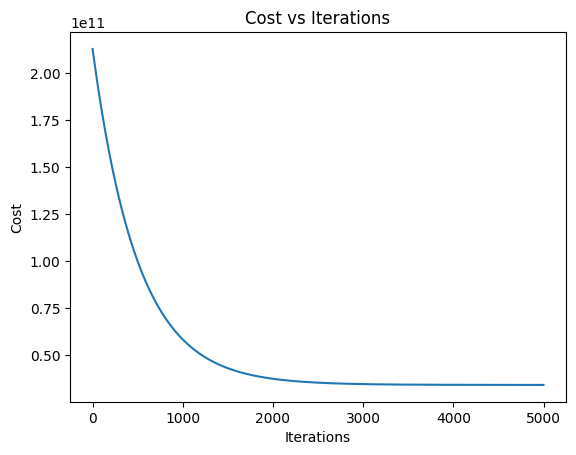

In [8]:
pl.plot(range(len(J_hist)), J_hist)
pl.xlabel('Iterations')
pl.ylabel('Cost')
pl.title('Cost vs Iterations')
pl.show()


In [9]:
house_area = float(input("Enter area of house: "))
house_area_norm = (house_area - x_mean)/x_std
predicted_price = w_final*house_area_norm + b_final
print(f"Predicted price for the house with area {house_area} sqft: {predicted_price:.2f}")

Predicted price for the house with area 8900.0 sqft: 2437472.90
